In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

IMG_SIZE = 50

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)

history= model.fit(X, y, batch_size=32, epochs=5, validation_split=0.3)

Train on 1493 samples, validate on 641 samples
Epoch 1/5
1493/1493 [==============================] - 66s 44ms/sample - loss: 0.3286 - accuracy: 0.8721 - val_loss: 0.0701 - val_accuracy: 0.9766
Epoch 2/5
1493/1493 [==============================] - 57s 38ms/sample - loss: 0.0955 - accuracy: 0.9658 - val_loss: 0.0676 - val_accuracy: 0.9797
Epoch 3/5
1493/1493 [==============================] - 56s 38ms/sample - loss: 0.0741 - accuracy: 0.9719 - val_loss: 0.0491 - val_accuracy: 0.9844
Epoch 4/5
1493/1493 [==============================] - 57s 38ms/sample - loss: 0.0472 - accuracy: 0.9859 - val_loss: 0.0509 - val_accuracy: 0.9844
Epoch 5/5
1493/1493 [==============================] - 56s 38ms/sample - loss: 0.0929 - accuracy: 0.9638 - val_loss: 0.0676 - val_accuracy: 0.9782


In [2]:
history.history

{'loss': [0.32864033884436833,
  0.0954849190026901,
  0.0740958373377328,
  0.047248251506608364,
  0.09294530961722415],
 'accuracy': [0.87206966, 0.9658406, 0.9718687, 0.9859344, 0.9638312],
 'val_loss': [0.07014047402369844,
  0.0676226183792428,
  0.04912586014907787,
  0.05090695786705406,
  0.06761983542334594],
 'val_accuracy': [0.97659904, 0.97971916, 0.9843994, 0.9843994, 0.9781591]}

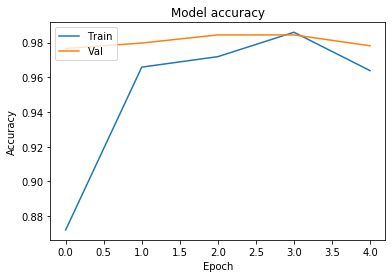

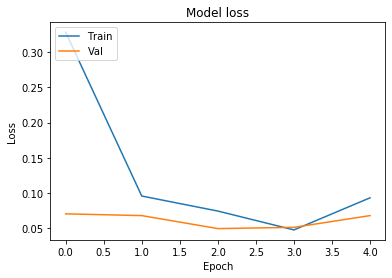

In [6]:
import matplotlib.pyplot as plt
#plot training validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#plot training validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()